In [89]:
# Validation in Field V4

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "F4")
import pcse
cropfile = os.path.join(data_dir, 'F4.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=0.245, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'F4_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider("Climat_F4.xlsx")
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2004-05-23,2.0,0.0,5935.379058,2679.841989,1098.131622,2157.405447,437.49352,0.0,55.0,0.212458,19.335180,0.0,0.026801
2004-05-24,2.0,0.0,5935.379058,2679.841989,1098.131622,2157.405447,437.49352,0.0,55.0,0.211971,19.308379,0.0,0.034460
2004-05-25,2.0,0.0,5935.379058,2679.841989,1098.131622,2157.405447,437.49352,0.0,55.0,0.211344,19.273918,0.0,0.025165
2004-05-26,2.0,0.0,5935.379058,2679.841989,1098.131622,2157.405447,437.49352,0.0,55.0,0.212705,19.348753,0.0,0.131408
2004-05-27,2.0,0.0,5935.379058,2679.841989,1098.131622,2157.405447,437.49352,0.0,55.0,0.223952,19.967345,0.0,0.439120


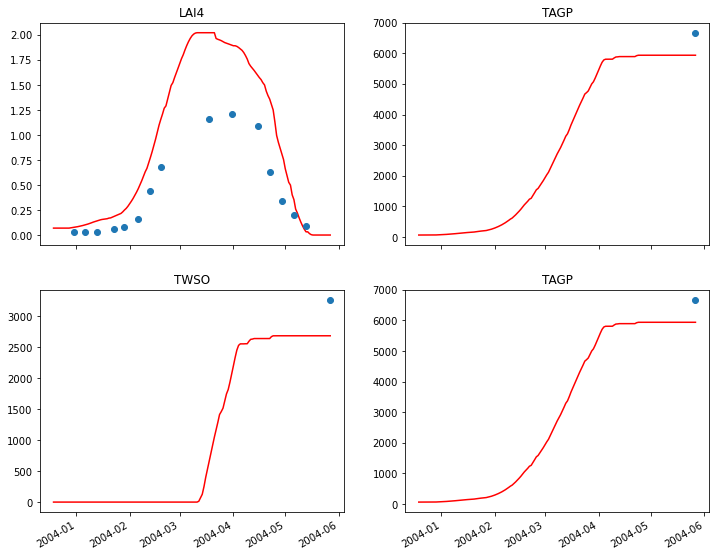

In [96]:
sortie_V4 = pd.read_excel('/Users/mac/Desktop/data/donn‚es_rendement_biomasse_CC_ET_climat/LAI_TAGP_TWSO_2003_2004.xlsx' , sheet_name='V4') 
result = sortie_V4.set_index("day")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'r-')
    ax.set_title(var)
for var, ax in zip(["LAI4", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

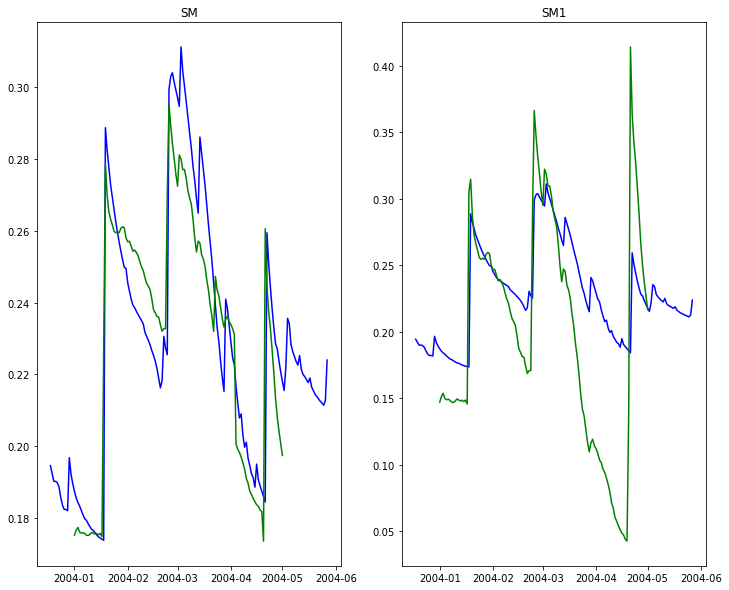

In [97]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_V4s.xls")

sortie_SM = pd.read_excel('/Users/mac/Soil Moisture_V4.xlsx') 
result_SM = sortie_SM.set_index("day")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "SM1"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'g-')
    ax.set_title(var)
# fig.autofmt_xdate()

In [25]:
# Below are the processes performed on the field data. 
# I just set up algorithms to automatically calculate the average daily wind speed, define the min and max temperature etc... 
# Because the observations were recorded every 30min.

Data = pd.read_excel('/Users/mac/Desktop/data/data_Lucas_R3_bl‚_2002:2003.xlsx', sheet_name="2004") 
# Data

In [52]:
Data1 = pd.read_excel('/Users/mac/Desktop/data/data_Lucas_R3_bl‚_2002:2003.xlsx', sheet_name="Sol_V4") 
Data1

,day,1m,45m,30m,20m,10m,5m
0,1,0.616,0.402,0.534,0.534,0.572,0.635
1,1,0.616,0.402,0.534,0.534,0.571,0.634
2,1,0.616,0.402,0.534,0.534,0.570,0.632
3,1,0.616,0.402,0.534,0.533,0.569,0.631
4,1,0.616,0.402,0.533,0.533,0.569,0.630
...,...,...,...,...,...,...,...
7119,149,0.697,0.664,0.468,0.417,0.468,0.286
7120,149,0.697,0.664,0.468,0.416,0.468,0.287
7121,149,0.698,0.664,0.467,0.416,0.471,0.287
7122,149,0.698,0.664,0.466,0.415,0.471,0.288


In [136]:
Data.at[12519,"RG_3m"]

-5.366

In [7]:
somme = 0
y=14352
z=14400
t=0
lst_rg = []
for t in range (0,66) :
    for i in range (y,z) : 
        x = Data.at[i,"RG_3m"]
        somme = somme + x
    lst_rg.append((somme)*3.6)
    y=z
    z=y+48
    somme = 0
# lst_rg

In [10]:
somme = 0
y=0
z=48
t=0
lst_rg = []
for t in range (0,181) :
    for i in range (y,z) : 
        x = Data.at[i,"RG_3m"]
        somme = somme + x
    lst_rg.append((somme)*3.6)
    y=z
    z=y+48
    somme = 0
# lst_rg

In [169]:
MIN = 2000
y=0
z=48
t=0
lst_min = []
for t in range (0,181) :
    for i in range (y,z) : 
        x = Data.at[i,"Tair-6m"]
        if  (x <= MIN) :  
            MIN = x 
        MIN =MIN
    lst_min.append(MIN)
    y=z
    z=y+48
    MIN = 2000
# lst_min

In [179]:
somme = 0
y=0
z=48
t=0
lst_wind = []
for t in range (0,181) :
    for i in range (y,z) : 
        x = Data.at[i,"Vv"]
        somme = somme + x
    lst_wind.append((somme/48))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_wind

In [173]:
MAX = -2000
y=0
z=48
t=0
lst_max = []
for t in range (0,181) :
    for i in range (y,z) : 
        x = Data.at[i,"Tair-6m"]
        if  (MAX <= x) :  
            MAX = x 
        MAX =MAX
    lst_max.append(MAX)
    y=z
    z=y+48
    MAX = -2000
# lst_max

In [153]:
for i in range (48,96) :
    g = Data.at[i,"Vv"]
#     print (g)

In [175]:
somme = 0
y=0
z=48
t=0
lst_rain = []
for t in range (0,181) :
    for i in range (y,z) : 
        x = Data.at[i,"pluie"]
        somme = somme + x
    lst_rain.append((somme))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_rain

In [181]:
somme = 0
y=0
z=48
t=0
lst_HR = []
for t in range (0,181) :
    for i in range (y,z) : 
        x = Data.at[i,"HR- 6m"]
        somme = somme + x
    lst_HR.append((somme/48))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_HR

In [114]:
df = pd.DataFrame([[lst_HR], [lst_rain], [lst_max], [lst_min], [lst_rg], [lst_wind]],
                  index=["RH", "RG", "Tmin", "Tmax", "WIND", "RAIN"], columns=[1])
df
df.to_excel("ClimatF4.xlsx")

In [115]:
import numpy as np
Climat_F4 = np.array(list(zip(lst_HR, lst_rain, lst_max, lst_min, lst_rg, lst_wind)))
# Climat_F4
# Climat_F4.savetxt("ClimatF4")

In [63]:
somme = 0
y=0
z=48
t=0
lst_sm = []
for t in range (0,148) :
    for i in range (y,z) : 
        x = Data1.at[i,"1m"]
        somme = somme + x
    lst_sm.append((somme/48))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_sm

In [64]:
somme = 0
y=0
z=48
t=0
lst_sm = []
for t in range (0,148) :
    for i in range (y,z) : 
        x = Data1.at[i,"45m"]
        somme = somme + x
    lst_sm.append((somme/48))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_sm

In [65]:
somme = 0
y=0
z=48
t=0
lst_sm = []
for t in range (0,148) :
    for i in range (y,z) : 
        x = Data1.at[i,"30m"]
        somme = somme + x
    lst_sm.append((somme/48))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_sm

In [66]:
somme = 0
y=0
z=48
t=0
lst_sm = []
for t in range (0,148) :
    for i in range (y,z) : 
        x = Data1.at[i,"20m"]
        somme = somme + x
    lst_sm.append((somme/48))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_sm

In [67]:
somme = 0
y=0
z=48
t=0
lst_sm = []
for t in range (0,148) :
    for i in range (y,z) : 
        x = Data1.at[i,"10m"]
        somme = somme + x
    lst_sm.append((somme/48))
#     print(y,z)
    y=z
    z=y+48
    somme = 0
# lst_sm

In [2]:
# somme = 0
# y=0
# z=48
# t=0
# lst_sm = []
# for t in range (0,148) :
#     for i in range (y,z) : 
#         x = Data1.at[i,"5m"]
#         somme = somme + x
#     lst_sm.append((somme/48))
# #     print(y,z)
#     y=z
#     z=y+48
#     somme = 0
# # lst_sm

In [47]:
for i in range (0,48) :
    g = Data1.at[i,"1m"]
#     print (g)